In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

# Load data and understand

In [2]:
data=pd.read_csv("CC GENERAL.csv")

In [3]:
data.shape

(8950, 18)

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


from the analysis it is revealed that:
a) Only numerical features are there 
b) CREDIT_LIMIT and MINIMUM_PAYMENTS contain null values.
c) CUST_ID will be removed as it is unique and will not contribute in the analysis
d) The analysis reveals a noticeable difference between the mean and median values for most features. This suggests potential skewness in the dataset, requiring further investigation and possible corrective measures.

Data Preprocessing
Handeling missing values

In [7]:
# Checking the missing value
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
data[data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


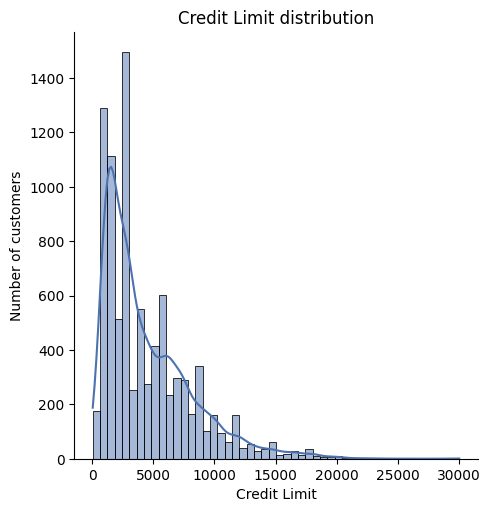

In [9]:
#plot
sns.set_palette("deep")
sns.displot(data['CREDIT_LIMIT'],kde=True,bins=50)
plt.xlabel('Credit Limit')
plt.ylabel("Number of customers")
plt.title("Credit Limit distribution")

plt.show()

# As data is right skewed then it is better to handel the missing value as median distribution instead of mean

In [10]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

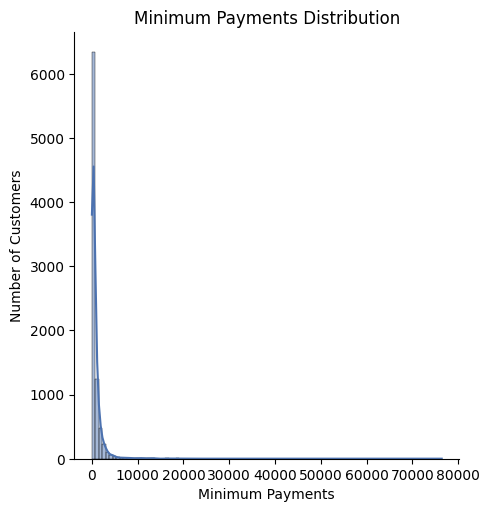

In [11]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=data, x='MINIMUM_PAYMENTS', kde=True, bins=100)
    
plt.xlabel('Minimum Payments')
plt.ylabel('Number of Customers')
plt.title('Minimum Payments Distribution')

plt.show()

# As data is right skewed then it is better to handel the missing value as median distribution instead of mean

In [12]:
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [13]:
# drop the CUST ID columns as that is unique value and can't be used in the model development
print("Before dropping ID column",data.shape)
data.drop(columns='CUST_ID',axis=1,inplace=True)
print("After dropping ID column",data.shape)

Before dropping ID column (8950, 18)
After dropping ID column (8950, 17)


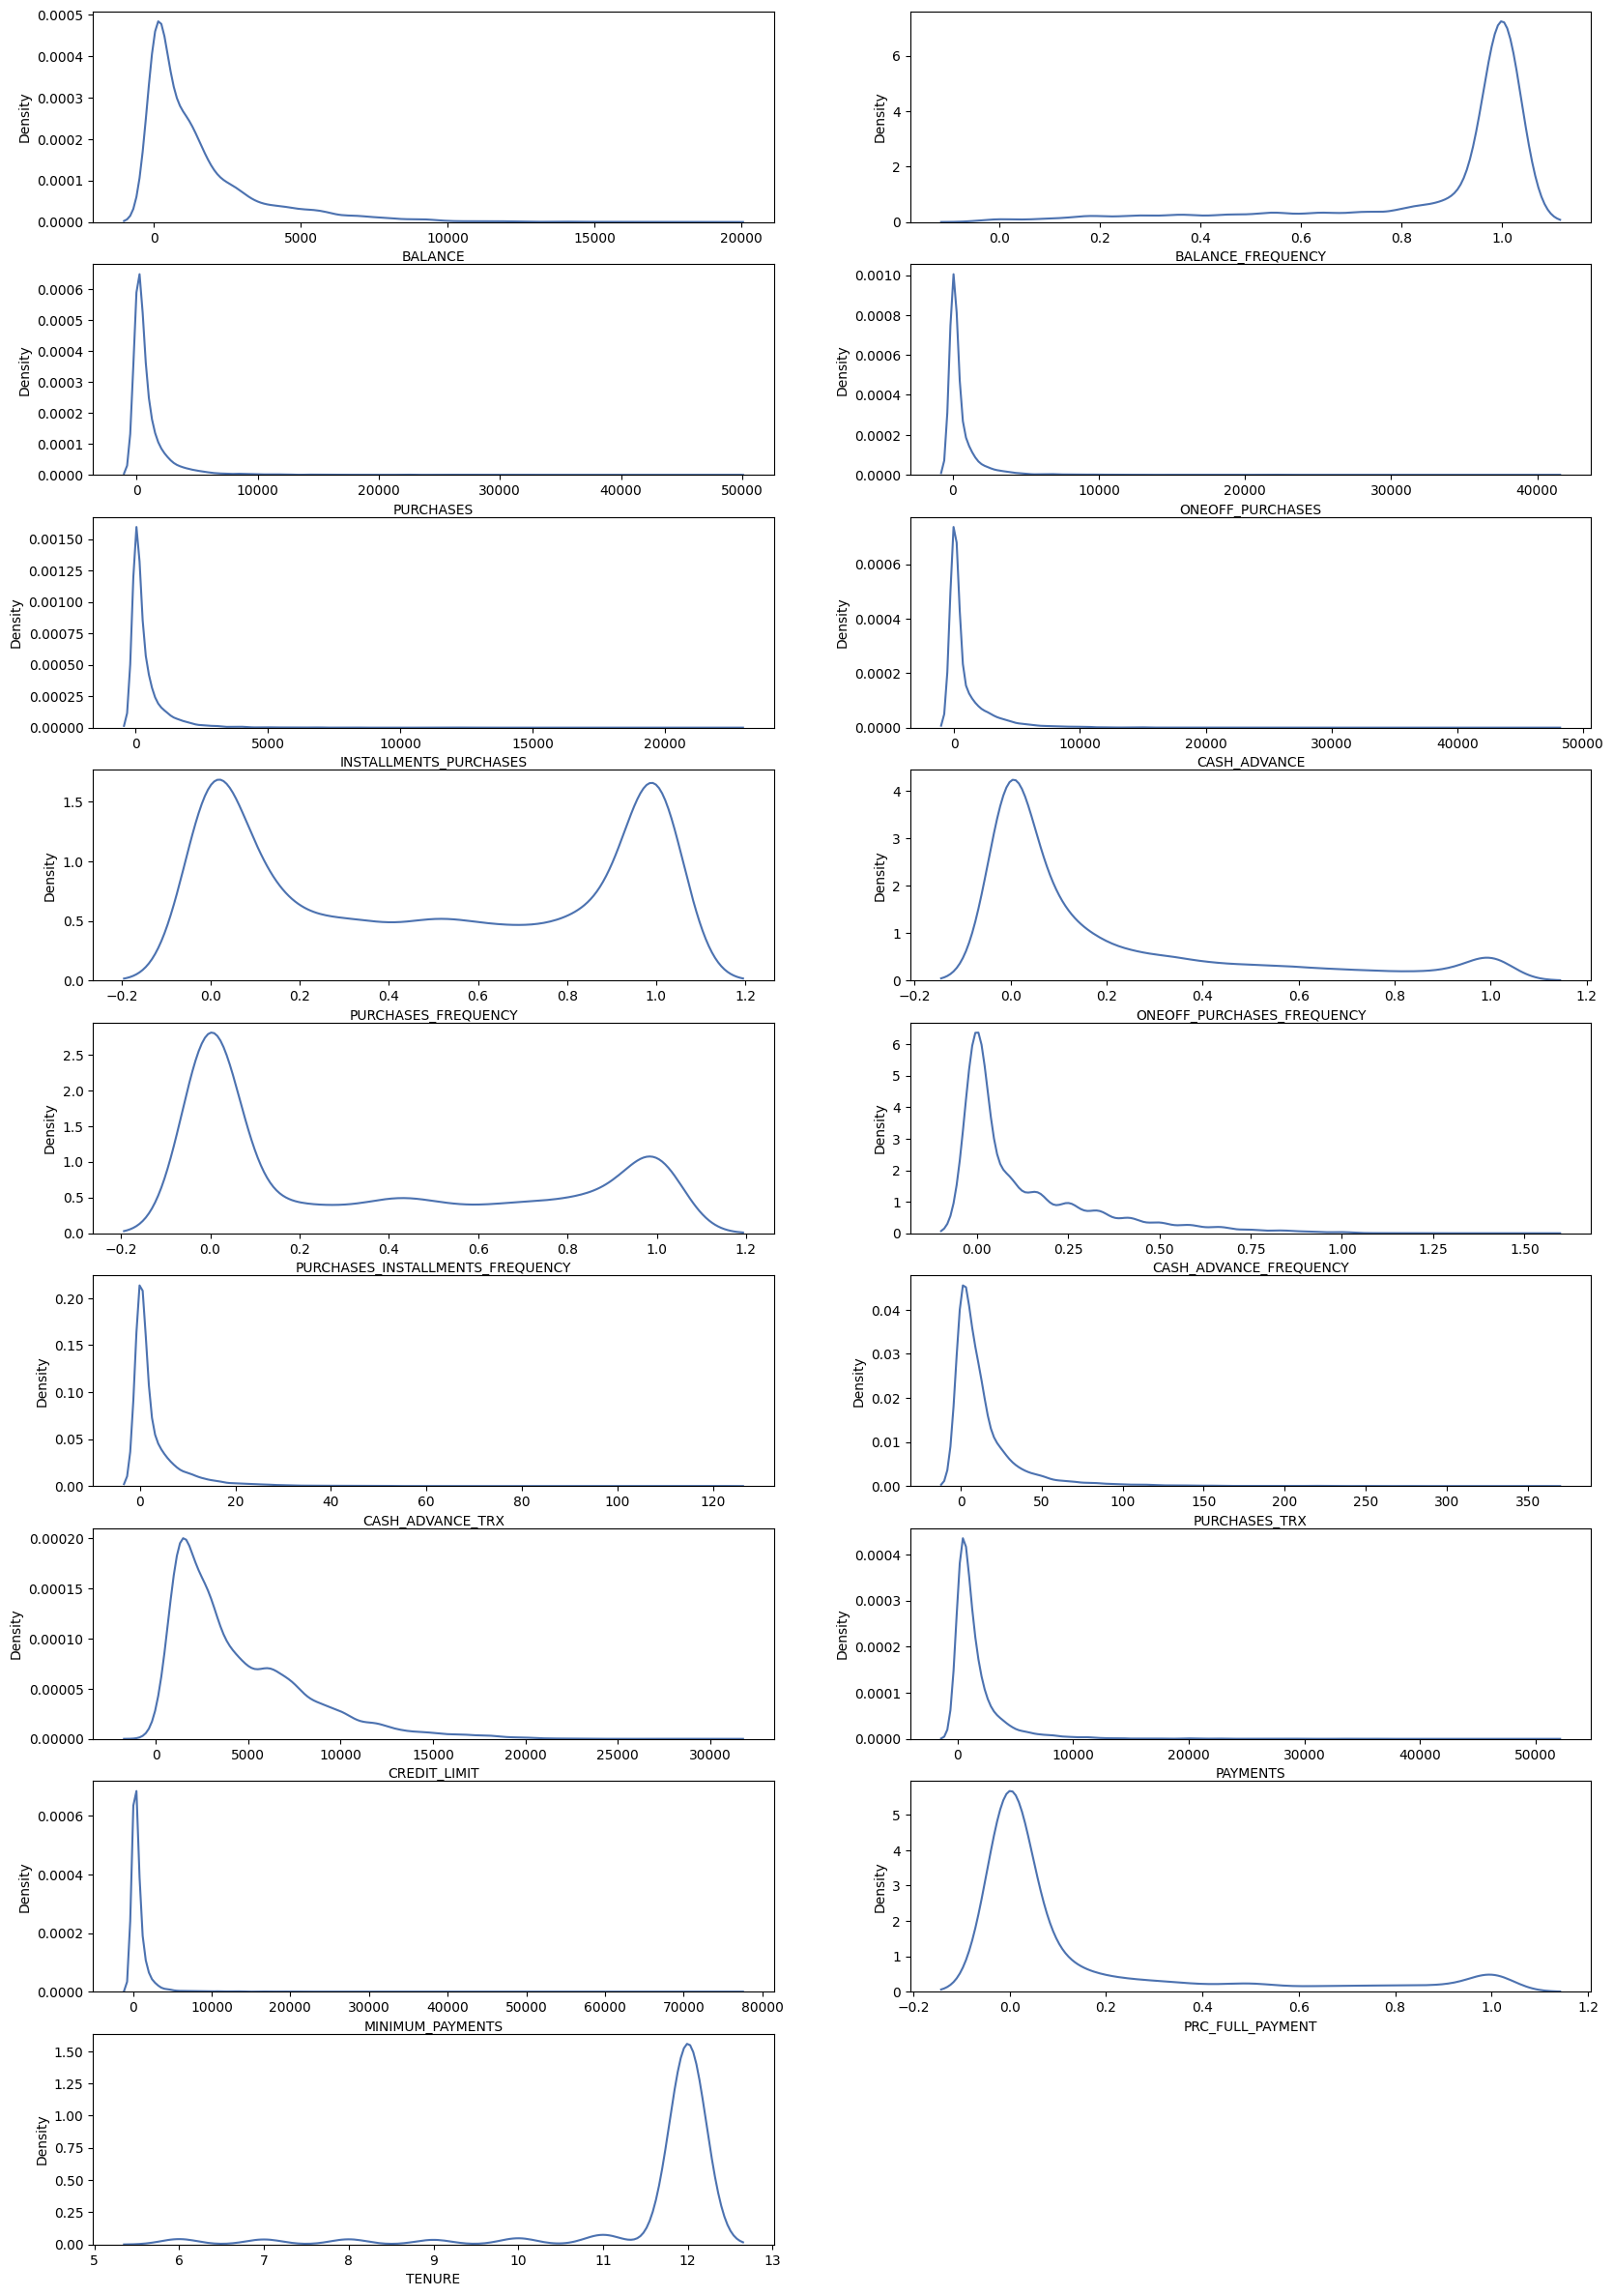

In [14]:
plt.figure(figsize=(20,30))
for i,col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(data[col],ax=ax)
        plt.xlabel(col)

plt.show()

The presence of skewness in our data is not surprising, as it is expected that there will be a small number of customers who make a significant number of purchases, while the majority of customers make fewer purchases.

Handle Skweness : 

In [15]:
positively_skewed_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

df=data.copy()
for i in positively_skewed_cols:
    df[i]=np.log(1+df[i])

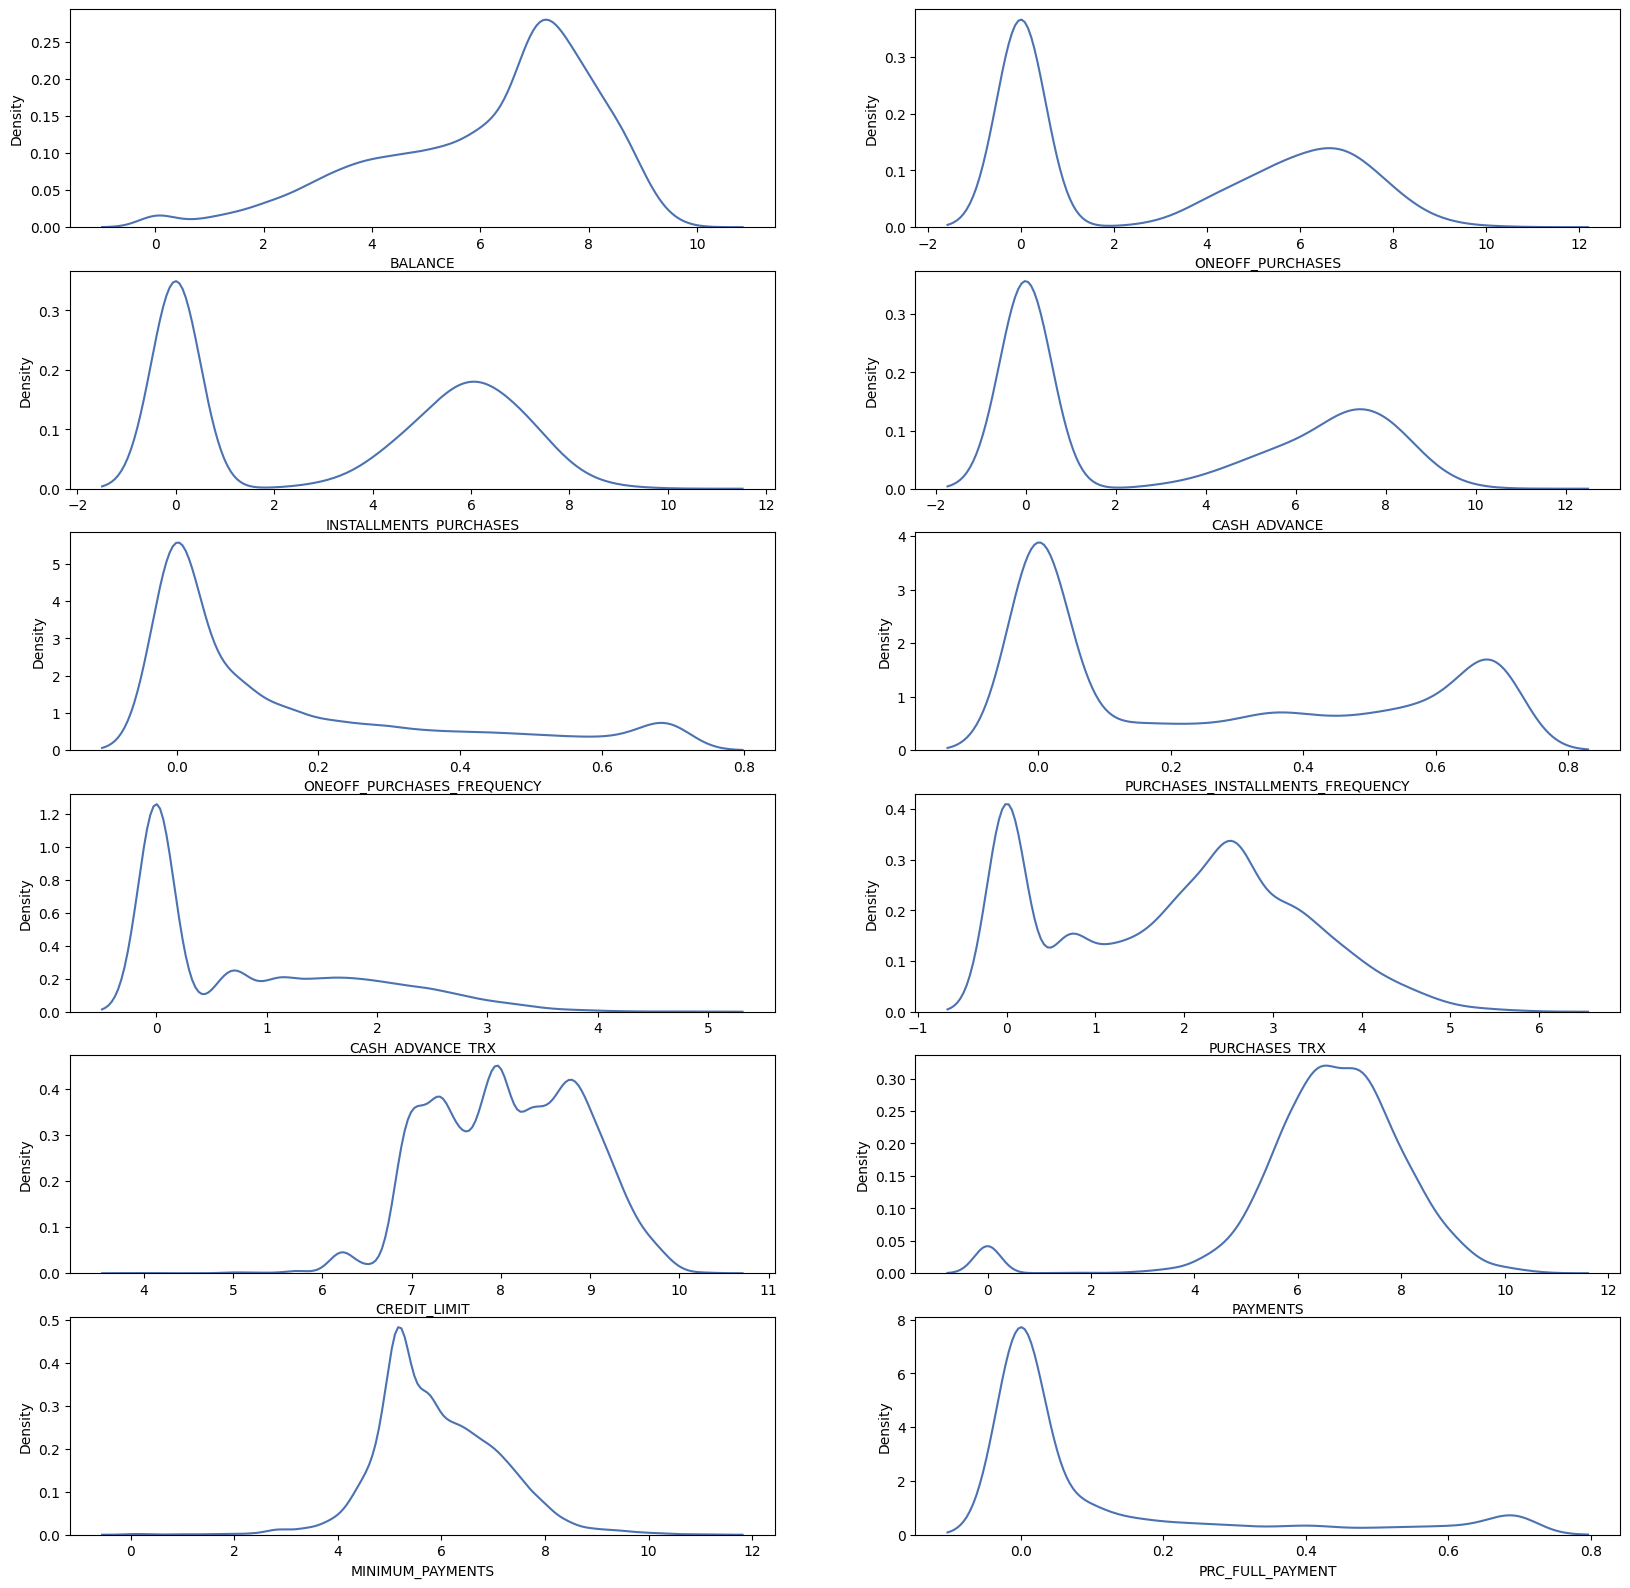

In [16]:
plt.figure(figsize=(20,30))

for i , col in enumerate(positively_skewed_cols):
    ax=plt.subplot(9,2,i+1)
    sns.kdeplot(df[col],ax=ax)
    plt.xlabel(col)

plt.show()

While the distribution may not appear to be ideal, the transformation we applied has improved it compared to the original state.

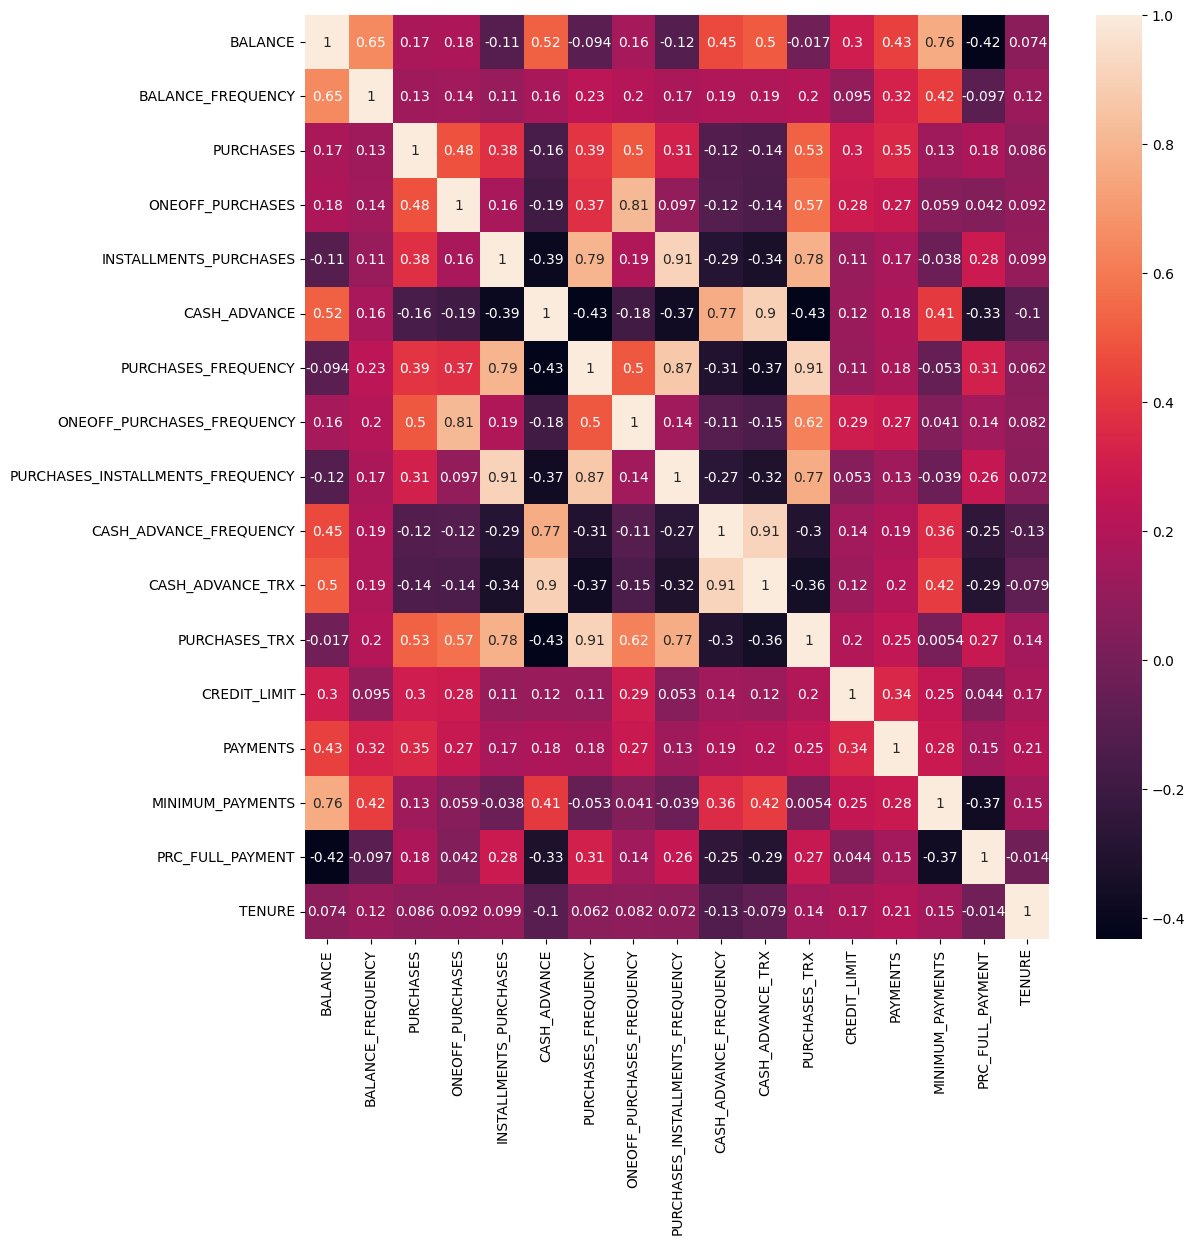

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
# Applying pcs to reduce the dimensionality of data 
pca=PCA(n_components=0.95 )
X=pca.fit_transform(df)

In [36]:
pca.explained_variance_

array([4565213.40271142])

In [37]:
# Finding required number of cluster to create appropriate segments of credit card customer
n_clusters=15
inertia=[]
for i in range(1,n_clusters):
    kmeans=KMeans(n_clusters=i,random_state=23)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


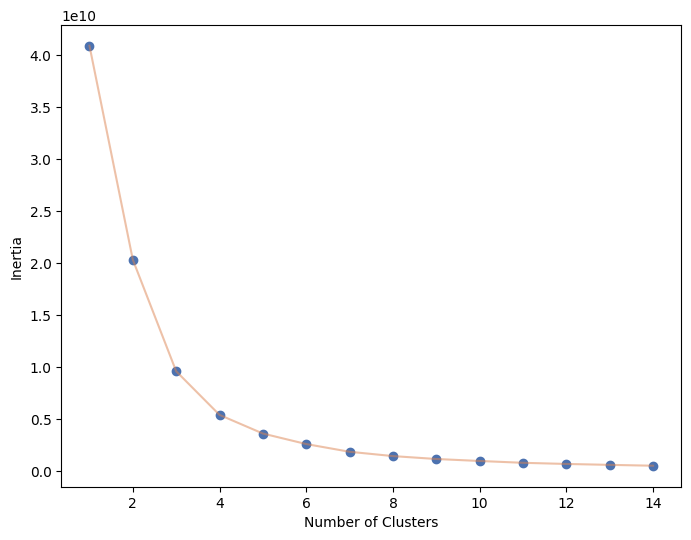

In [43]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,n_clusters),inertia,'o')
plt.plot(np.arange(1,n_clusters),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [44]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
labels=kmeans.labels_

In [50]:
clusters=pd.concat([data,pd.DataFrame({'clusters':labels})],axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [66]:
# Distinct clusters in dataset
clusters['clusters'].unique()

array([2, 3, 0, 1])

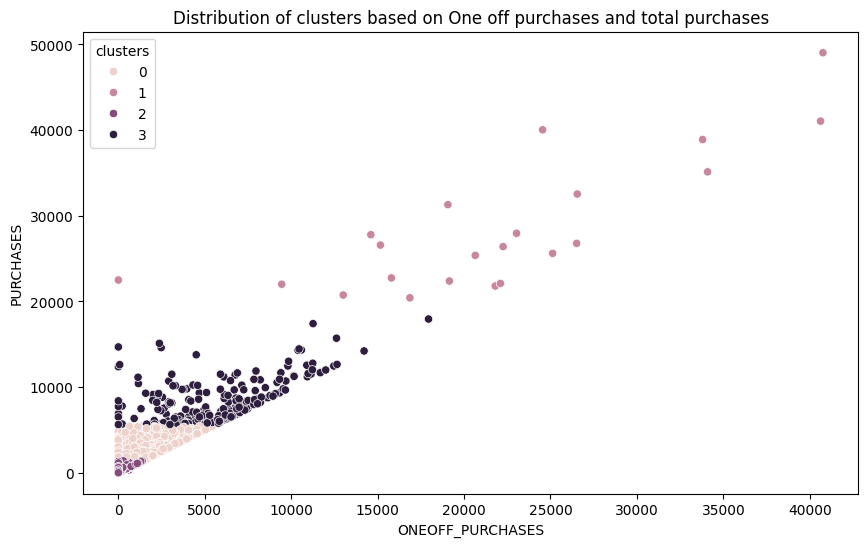

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='ONEOFF_PURCHASES', y='PURCHASES', hue='clusters')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

Conclusion
By segmenting the data into four clusters, we have effectively categorized the dataset based on distinct characteristics or patterns. These segments can provide valuable insights for formulating targeted marketing strategies. Since each segment exhibits different purchase capacities, understanding these variations allows for tailored approaches to maximize effectiveness and meet the unique needs of each customer group.